In [86]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [87]:
import numpy as np
import pandas as pd
import datetime as dt
from flask import Flask, jsonify

# Reflect Tables into SQLAlchemy ORM

In [88]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [89]:
# create engine to hawaii.sqlite
database_path = "Resources/hawaii.sqlite"
engine = create_engine(f"sqlite:///{database_path}")

In [90]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [91]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [92]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [93]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [94]:
inspector = inspect(engine)
inspector.get_table_names()

columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [95]:
session.query(Measurement.date).order_by(Measurement.date).first()

('2010-01-01')

In [96]:
# Find the most recent date in the data set.- pull out the year 
most_recent_year = session.query(Measurement.date, Measurement.prcp).order_by(Measurement.date.desc()).first()[0][0:4]
most_recent_year

'2017'

In [97]:
# # Pull out 
# most_recent_year = session.query(Measurement.date, Measurement.prcp).order_by(Measurement.date.desc()).all()[0]
# most_recent_year

In [38]:
#int(most_recent_year) - 1 

In [98]:
# Pull out the month 
most_recent_month = session.query(Measurement.date, Measurement.prcp).order_by(Measurement.date.desc()).first()[0][5:7]
most_recent_month

'08'

In [99]:
# Pull out the day 
most_recent_day = session.query(Measurement.date, Measurement.prcp).order_by(Measurement.date.desc()).first()[0][8:]
most_recent_day

'23'

In [100]:
#Pull them as a integer 
most_recent_date = dt.date(int(most_recent_year),int(most_recent_month),int(most_recent_day))
most_recent_date

datetime.date(2017, 8, 23)

In [101]:
# latest = session.query(Measurement.date, Measurement.prcp).order_by(Measurement.date.desc())

In [102]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
#Convert the object type into string 
# converted_recent_date = dt.datetime.strptime(latest, '%Y-%m-%d').date()
# converted_recent_date

In [103]:
#Calculate the date one year from the last date in data set.
# one_year_ago = most_recent_date - dt.timedelta(days=365)
# one_year_ago

one_year_ago = dt.date(int(most_recent_year)-1,int(most_recent_month),int(most_recent_day))
one_year_ago

datetime.date(2016, 8, 23)

In [104]:
# Perform a query to retrieve the data and precipitation scores

one_year_precipitation = session.query(Measurement.date,Measurement.prcp).\
    filter(Measurement.date >= one_year_ago).\
    filter(Measurement.date <= most_recent_date).all()

one_year_precipitation

[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06'

In [119]:
# Save the query results as a Pandas DataFrame and set the index to the date column
precipitation_df = pd.DataFrame(one_year_precipitation, columns=['Date','Precipitation'])
precipitation_df

Date  Precipitation
0     2016-08-23           0.00
1     2016-08-24           0.08
2     2016-08-25           0.08
3     2016-08-26           0.00
4     2016-08-27           0.00
...          ...            ...
2225  2017-08-19           0.09
2226  2017-08-20            NaN
2227  2017-08-21           0.56
2228  2017-08-22           0.50
2229  2017-08-23           0.45

[2230 rows x 2 columns]

In [120]:
#prcp_df
# precipitation_df = prcp_df.rename(columns={'date':'Date', 'prcp':'Precipitation'})

# one_year_precipitation

In [121]:
#precipitation_df
precipitation_df.set_index('Date', inplace=True)


In [122]:
sorted_precipitation_df = precipitation_df.sort_index()

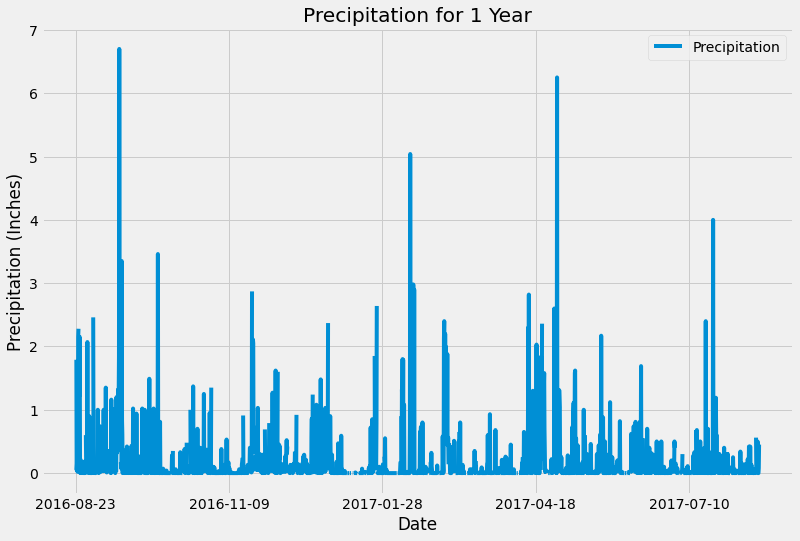

<Figure size 432x288 with 0 Axes>

In [123]:
# Use Pandas Plotting with Matplotlib to plot the data
ax = sorted_precipitation_df.plot(figsize=(12,8))
plt.title ("Precipitation for 1 Year")
plt.ylabel ("Precipitation (Inches)")
plt.xlabel("Date")
plt.show()
plt.savefig("Precipitation_Analysis.png")

In [64]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precipitation_df.describe()

Precipitation
count    2021.000000
mean        0.177279
std         0.461190
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000

# Exploratory Station Analysis

In [49]:
inspector = inspect(engine)
inspector.get_table_names()

columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [50]:
# Design a query to calculate the total number stations in the dataset
session.query(func.count(Station.id)).all()

[(9)]

In [51]:
total_stations = session.query(Station.id).count()
print(f'There are {total_stations} stations in total')

There are 9 stations in total


In [52]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
active_stations = session.query(Measurement.station,func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()
active_stations
# may_averages = session.query(*sel).\
#     filter(func.strftime("%m", Dow.date) == "05").\
#     group_by(Dow.stock).\
#     order_by(Dow.stock).all()
# may_averages

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [53]:
most_active_station = session.query(Measurement.station,
                  func.count(Measurement.station))\
.group_by(Measurement.station)\
.order_by(func.count(Measurement.station).desc()).limit(1).all()
print(most_active_station[0][0])

USC00519281


In [54]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station = active_stations[0][0]
sel = [Station.id, func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)]

most_active_station_temp = session.query(*sel).\
    filter(Measurement.station == most_active_station).all()[0]
most_active_station_temp

#print them 
print(f'The name of most active station is {most_active_station}')
print(f'The minimum temperature of the station is {most_active_station_temp[1]}')
print(f'The maximum temperature of the station is {most_active_station_temp[2]}')
print(f'The average temperature of the station is {most_active_station_temp[3]}')

The name of most active station is USC00519281
The minimum temperature of the station is 54.0
The maximum temperature of the station is 85.0
The average temperature of the station is 71.66378066378067


In [55]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temperature_observation = session.query (Measurement.tobs).\
    filter(Measurement.date >= one_year_ago).\
    filter(Measurement.date <= most_recent_date).\
    filter(Measurement.station == most_active_station).all()


temperature_observation_df = pd.DataFrame(temperature_observation)
temperature_observation_df

tobs
0    77.0
1    77.0
2    80.0
3    80.0
4    75.0
..    ...
347  77.0
348  77.0
349  76.0
350  76.0
351  79.0

[352 rows x 1 columns]

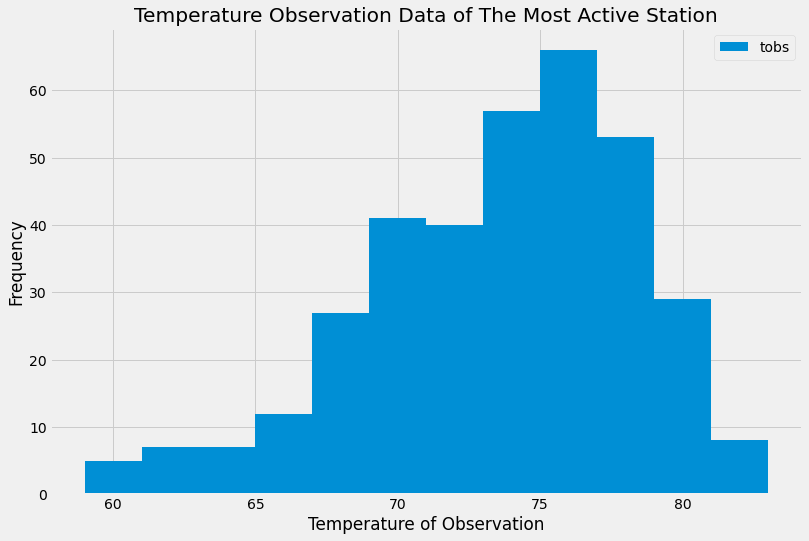

<Figure size 432x288 with 0 Axes>

In [56]:
temperature_observation_df.plot.hist(by='station',bins=12, figsize=(12,8))
plt.ylabel('Frequency')
plt.xlabel('Temperature of Observation')
plt.title(f'Temperature Observation Data of The Most Active Station')
plt.show()
plt.savefig("Temperature Observation Data of the Most Active Station")

# Close session

In [ ]:
# Close Session
session.close()